In [7]:
import pandas as pd
import numpy as np
import mlrose_hiive as mlrose
from mlrose_hiive import GeomDecay,ExpDecay,MaxKColorGenerator, KnapsackGenerator
import matplotlib.pyplot as plt
from multiprocessing import Pool
import os
import time
import multiprocessing as multi
import json
import itertools

In [106]:
def binary_to_decimal(binary_str):
    return int(binary_str, 2)

In [116]:
def delta_to_decimal(binary_str,length+1):
    return int(binary_str, length)

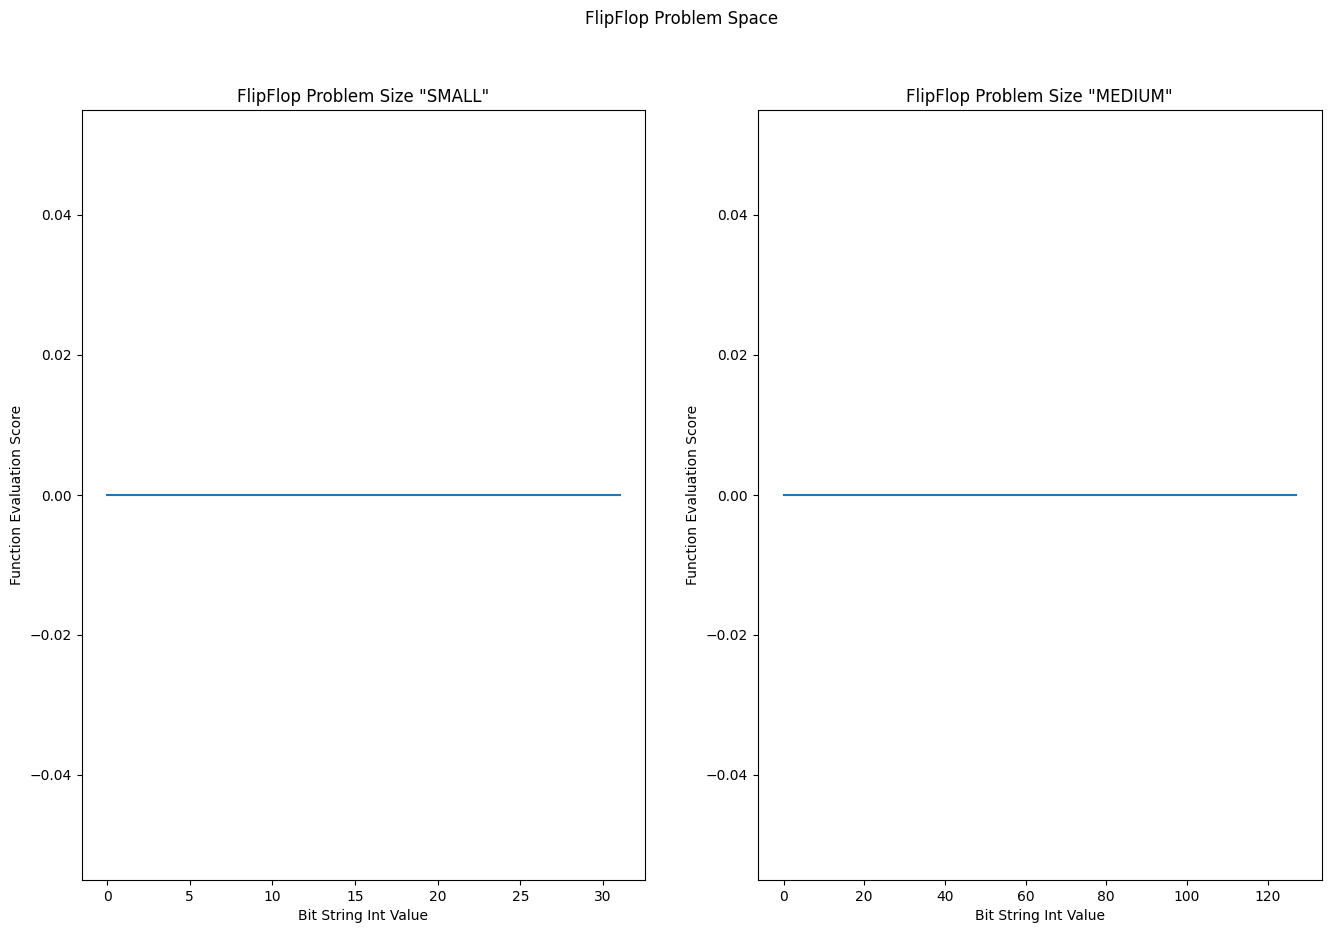

In [224]:
#Converting to subplot one for each problem size
fig,axes=plt.subplots(1,2)
fig.set_size_inches(8*2,10)
SIZE_DICT={0:'SMALL',1:'MEDIUM',2:"LARGE"}
plt.suptitle('FlipFlop Problem Space')
for i,length in enumerate([5,7]):
    problem=mlrose.Six()
    problem_space=list(itertools.product([0, 1], repeat=length))
    score=[]
    str_j_list=[]
    x_list=[]
    for p in problem_space:
        str_j=''
        for b in p:
            str_j+=str(b)
        str_j_list.append(str_j)
        x_list.append(binary_to_decimal(str_j))
        score.append(problem.evaluate(str_j))
    axes[i].plot(x_list,score)
    axes[i].set_ylabel('Function Evaluation Score')
    axes[i].set_xlabel('Bit String Int Value')
    axes[i].set_title('FlipFlop Problem Size "{}"'.format(SIZE_DICT[i]))


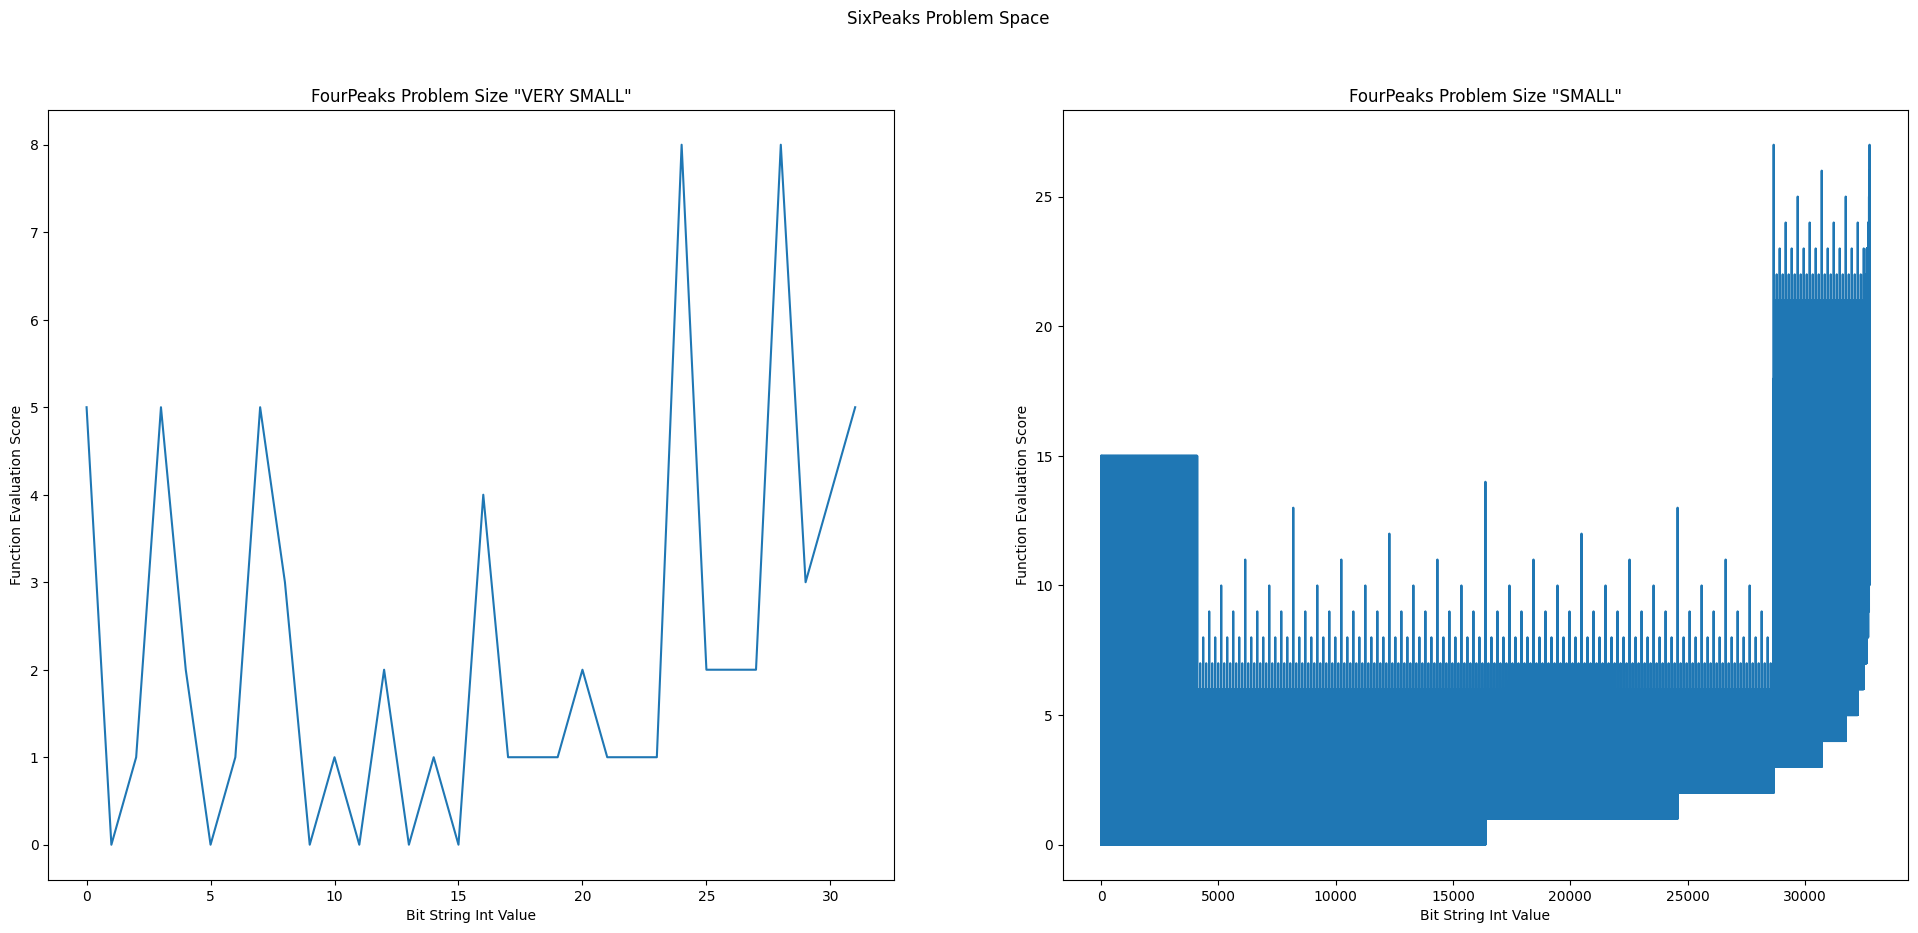

In [227]:
#Converting to subplot one for each problem size
fig,axes=plt.subplots(1,2)
fig.set_size_inches(8*3,10)
SIZE_DICT={0:'VERY SMALL',1:'SMALL'}
plt.suptitle('SixPeaks Problem Space')
for i,length in enumerate([5,15]):
    problem=mlrose.SixPeaks()
    problem_space=list(itertools.product([0, 1], repeat=length))
    score=[]
    str_j_list=[]
    x_list=[]
    for p in problem_space:
        str_j=''
        for b in p:
            str_j+=str(b)
        str_j_list.append(str_j)
        x_list.append(binary_to_decimal(str_j))
        score.append(problem.evaluate(p))
    axes[i].plot(x_list,score)
    axes[i].set_ylabel('Function Evaluation Score')
    axes[i].set_xlabel('Bit String Int Value')
    axes[i].set_title('FourPeaks Problem Size "{}"'.format(SIZE_DICT[i]))


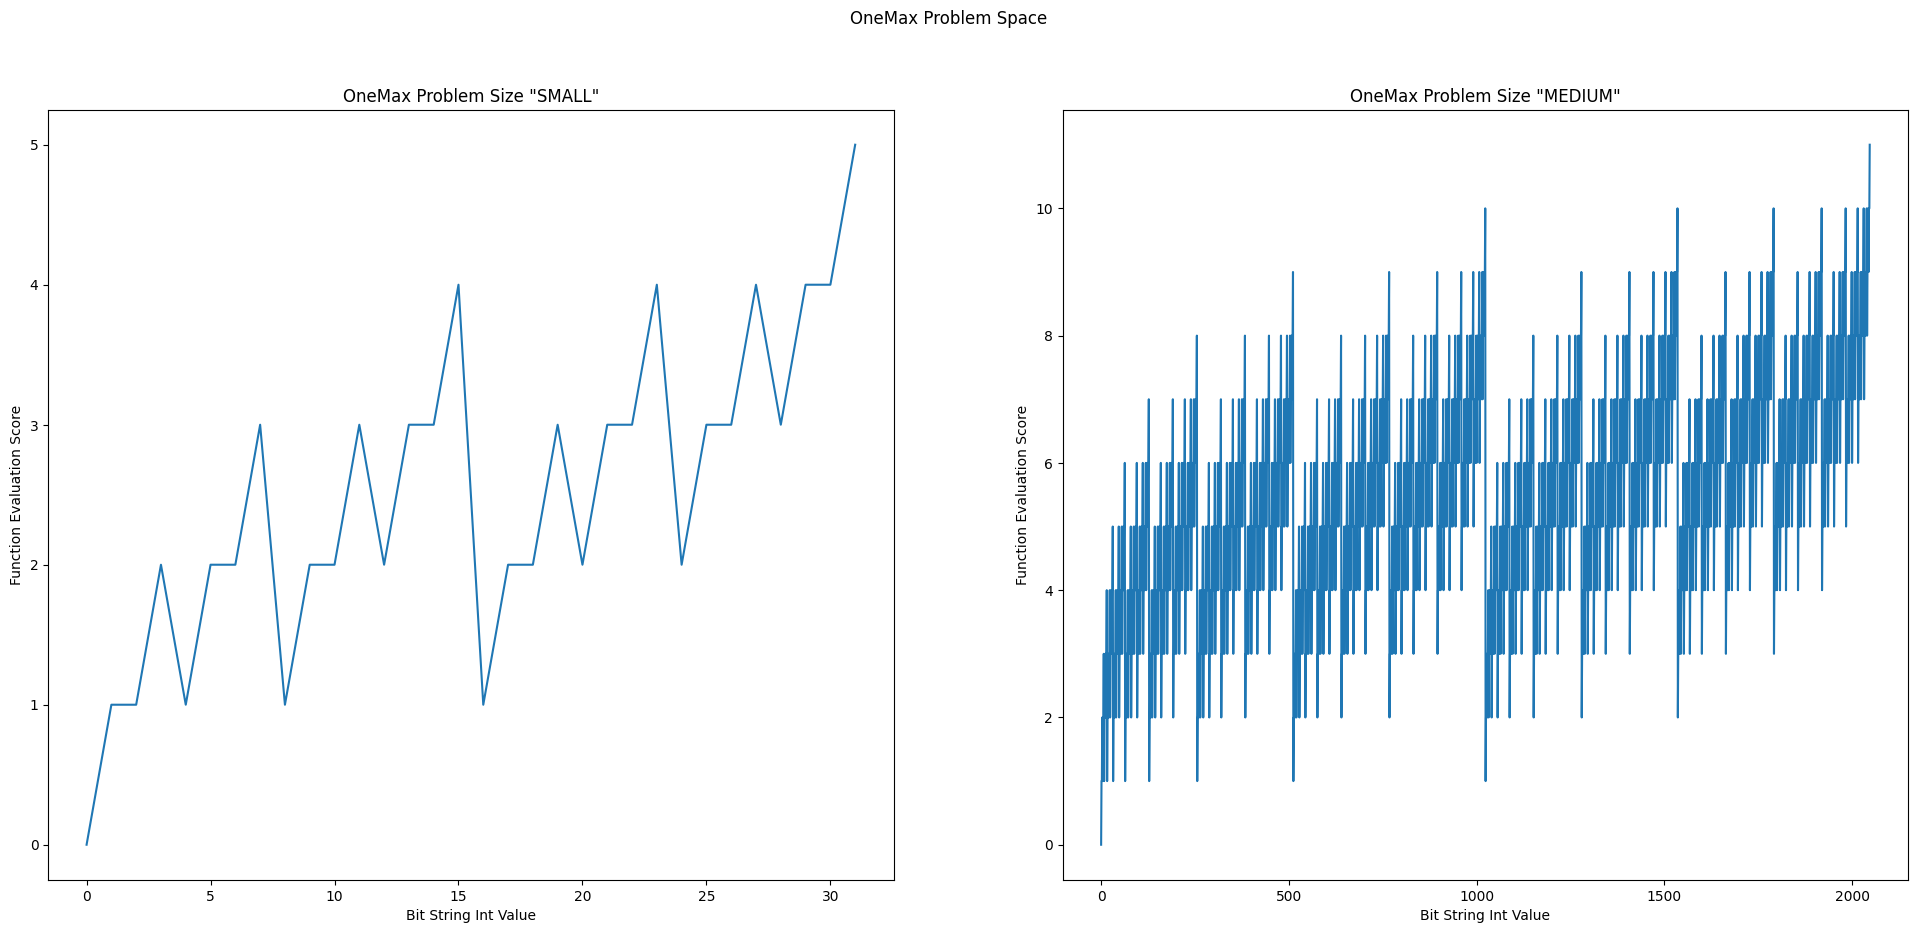

In [84]:
#Converting to subplot one for each problem size
fig,axes=plt.subplots(1,2)
fig.set_size_inches(8*3,10)
SIZE_DICT={0:'SMALL',1:'MEDIUM'}
plt.suptitle('OneMax Problem Space')
for i,length in enumerate([5,11]):
    problem=mlrose.OneMax()
    problem_space=list(itertools.product([0, 1], repeat=length))
    score=[]
    str_j_list=[]
    x_list=[]
    for p in problem_space:
        str_j=''
        for b in p:
            str_j+=str(b)
        str_j_list.append(str_j)
        x_list.append(binary_to_decimal(str_j))
        score.append(problem.evaluate(p))
    axes[i].plot(x_list,score)
    axes[i].set_ylabel('Function Evaluation Score')
    axes[i].set_xlabel('Bit String Int Value')
    axes[i].set_title('OneMax Problem Size "{}"'.format(SIZE_DICT[i]))


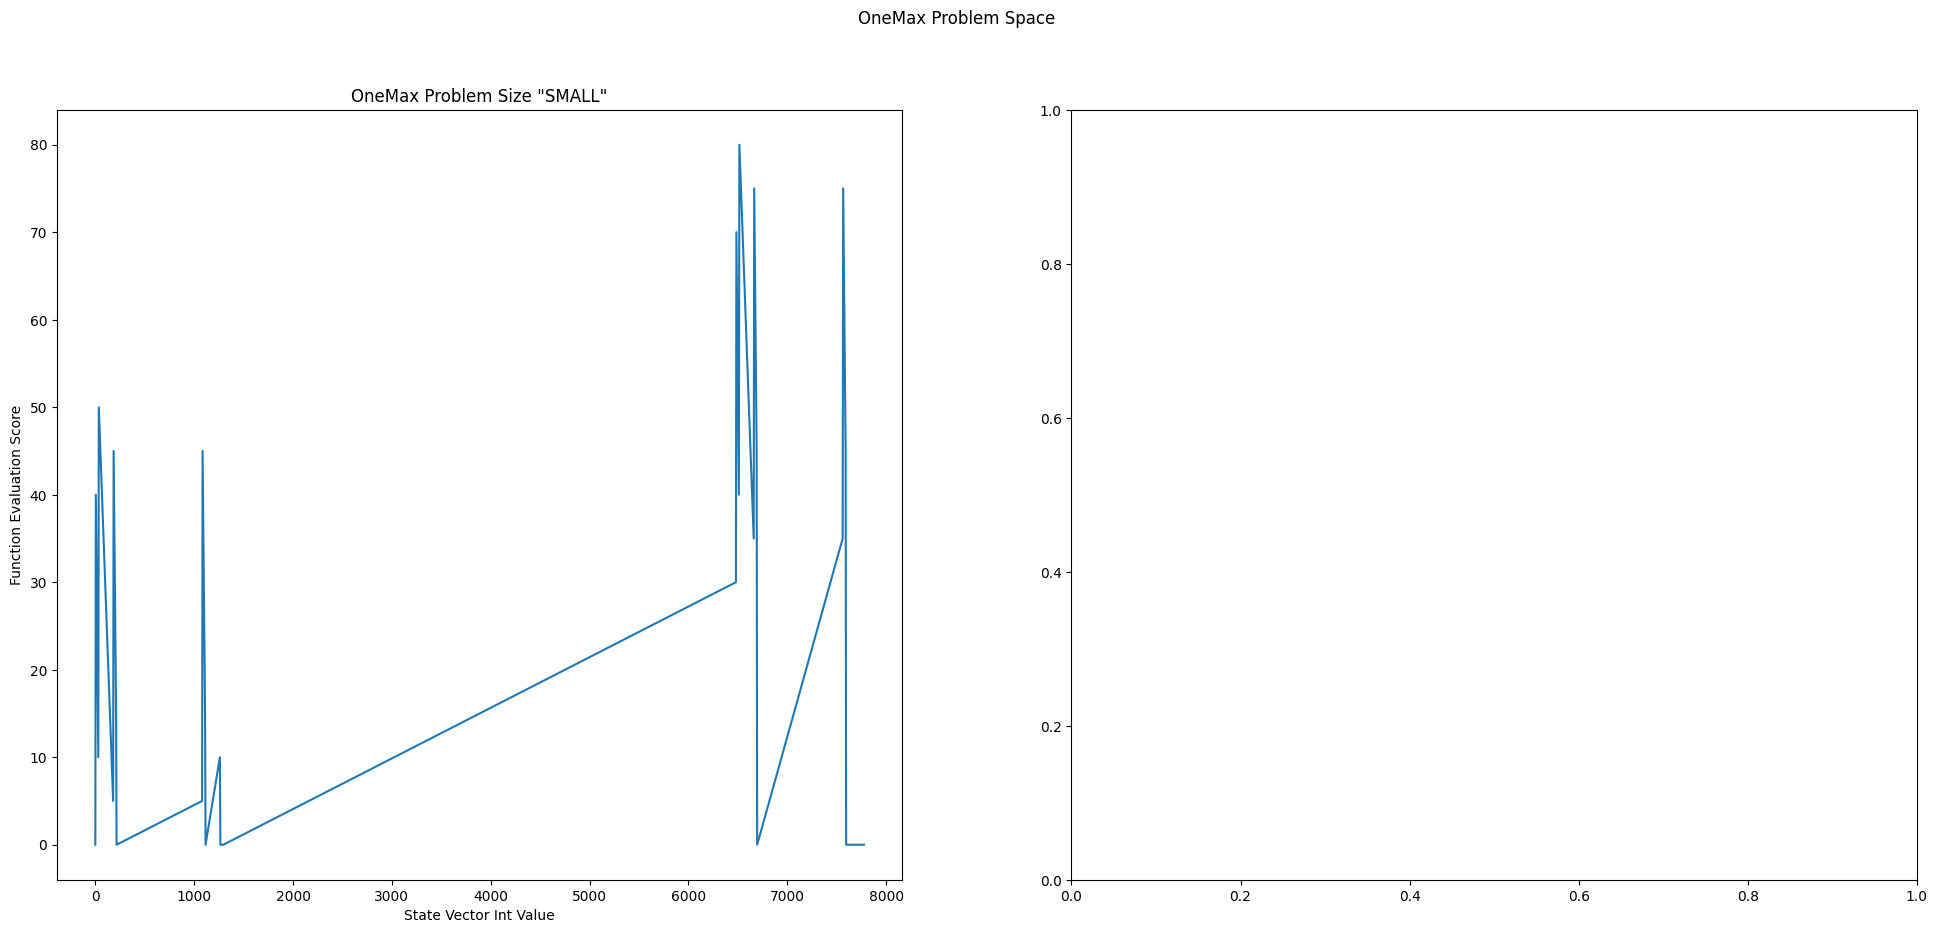

In [147]:
#Converting to subplot one for each problem size
fig,axes=plt.subplots(1,2)
fig.set_size_inches(8*3,10)
SIZE_DICT={0:'SMALL',1:'MEDIUM'}
plt.suptitle('OneMax Problem Space')
for i,length in enumerate([5]):
    problem=KnapsackGenerator().generate(seed=1,number_of_items_types=length).fitness_fn
    problem_space=list(itertools.product([0, length], repeat=length))
    score=[]
    str_j_list=[]
    x_list=[]
    for p in problem_space:
        str_j=''
        for b in p:
            str_j+=str(b)
        str_j_list.append(str_j)
        x_list.append(delta_to_decimal(str_j,length+1))
        score.append(problem.evaluate(p))
    axes[i].plot(x_list,score)
    axes[i].set_ylabel('Function Evaluation Score')
    axes[i].set_xlabel('State Vector Int Value')
    axes[i].set_title('OneMax Problem Size "{}"'.format(SIZE_DICT[i]))


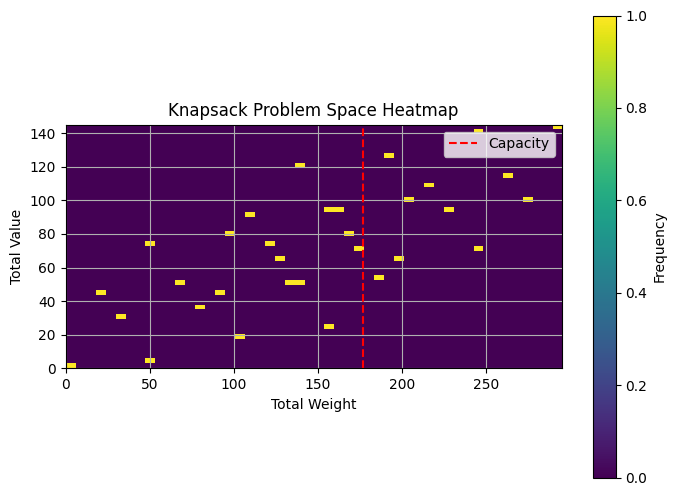

In [206]:
import matplotlib.pyplot as plt
import numpy as np

def plot_knapsack_heatmap(length):
    # Generate all possible combinations of items
    num_items = length
    combinations = np.array(np.meshgrid(*[[0, length]] * length)).T.reshape(-1, length)
    problem=KnapsackGenerator().generate(seed=8,number_of_items_types=length).fitness_fn

    # Compute weight and value for each combination
    total_weights = np.dot(combinations, problem.weights)
    total_values = np.dot(combinations, problem.values)

    # Create heatmap
    heatmap, xedges, yedges = np.histogram2d(total_weights, total_values, bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis')
    plt.colorbar(label='Frequency')
    plt.xlabel('Total Weight')
    plt.ylabel('Total Value')
    plt.title('Knapsack Problem Space Heatmap')
    plt.grid(True)
    plt.axvline(problem._w, color='red', linestyle='--', label='Capacity')
    plt.legend()
    plt.show()

# Plot the heatmap
plot_knapsack_heatmap(length)

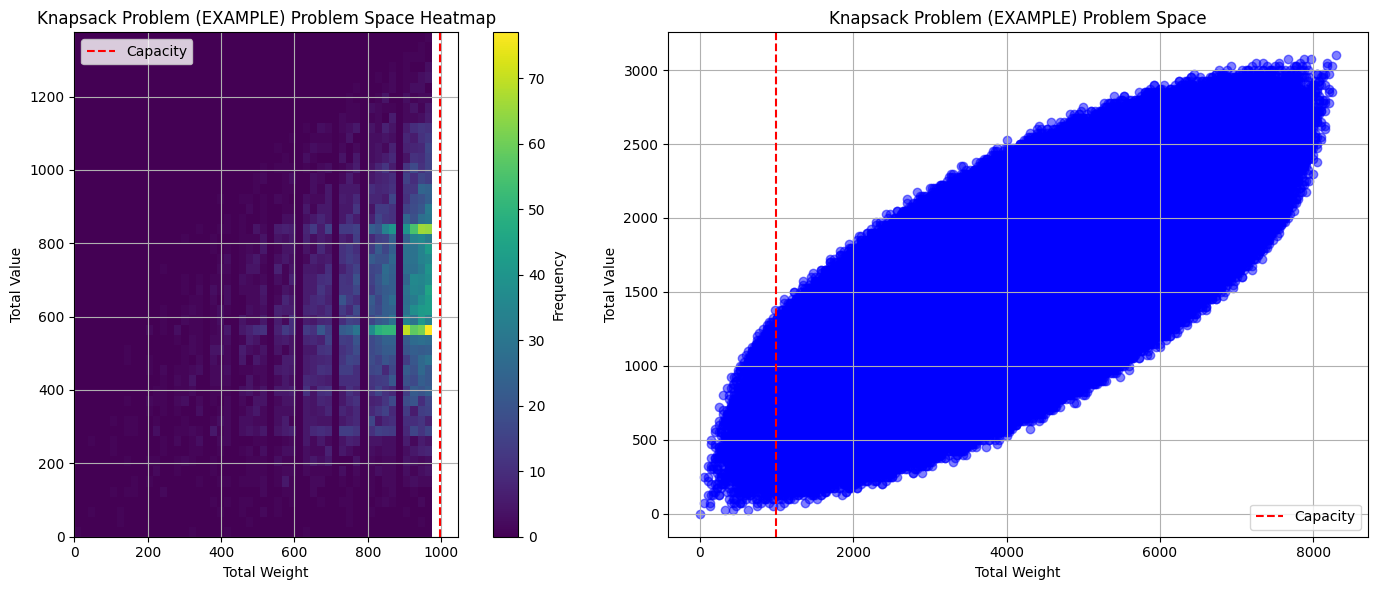

In [223]:
import matplotlib.pyplot as plt
import numpy as np

def plot_knapsack(length):
    # Generate all possible combinations of items
    num_items = length
    combinations = np.array(np.meshgrid(*[[0, length]] * length)).T.reshape(-1, length)
    problem=KnapsackGenerator().generate(seed=length,number_of_items_types=length).fitness_fn

    # Compute weight and value for each combination
    total_weights = np.dot(combinations, problem.weights)
    total_values = np.dot(combinations, problem.values)

    #Removing Weights where it's above max weight
    heat_weight=total_weights[total_weights<problem._w]
    heat_values=total_values[total_weights<problem._w]

    # Create heatmap
    heatmap, xedges, yedges = np.histogram2d(heat_weight, heat_values, bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    # Plot heatmap
    plt.figure(figsize=(15, 6))

    # Subplot for the heatmap
    plt.subplot(1, 2, 1)
    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis')
    plt.colorbar(label='Frequency')
    plt.xlabel('Total Weight')
    plt.ylabel('Total Value')
    plt.title('Knapsack Problem (EXAMPLE) Problem Space Heatmap')
    plt.grid(True)
    plt.axvline(problem._w, color='red', linestyle='--', label='Capacity')
    plt.legend()

    # Subplot for weight vs value
    plt.subplot(1, 2, 2)
    plt.scatter(total_weights, total_values, c='blue', alpha=0.5)
    plt.xlabel('Total Weight')
    plt.ylabel('Total Value')
    plt.title('Knapsack Problem (EXAMPLE) Problem Space')
    plt.grid(True)
    plt.axvline(problem._w, color='red', linestyle='--', label='Capacity')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the heatmap
length = 25
plot_knapsack(length)